</p>

# Automating Crypto Database using API Pull

In this project, we used <a href="https://coinmarketcap.com/api/documentation/v1/#">CoinMarketCap API</a> to pull the top 10 crpyto coin data, and automate the data collection in order to study their trend over time.

<h2 id="import_data">Pull Data</h2>

In [1]:
#First pull data from CoinMarketCap API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10', #limit to top 10 crypto coins
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-02T22:20:25.467Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': "You have used 127% of your plan's daily credit limit.", 'total_count': 8846}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9914, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capita

In [2]:
type(data)

dict

<h2 id="import_data">Data Transformation</h2>

In [3]:
import pandas as pd

#This allows you to see all the columns/rows, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])

#Adding a date & timeframe everytime it runs the script
import datetime
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\1030519493.py:6: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.925056e+07,1.925056e+07,NaN,1,None,None,None,2023-01-02T22:18:00.000Z,16752.361041,1.171590e+10,23.2854,0.122023,0.857268,-0.571435,-1.117818,-17.134844,-17.496693,3.224924e+11,39.8744,3.517996e+11,None,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.359213
1,1027,Ethereum,ETH,ethereum,6329,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,None,None,None,2023-01-02T22:18:00.000Z,1218.339469,3.641113e+09,48.9608,-0.044993,1.327978,0.019352,-3.363328,-20.685599,-10.393819,1.490929e+11,18.4342,1.490929e+11,None,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.359213
2,825,Tether,USDT,tether,45706,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.626371e+10,7.314177e+10,NaN,3,None,None,None,2023-01-02T22:18:00.000Z,0.999790,1.608098e+10,40.5516,0.002238,0.016959,-0.018533,-0.027259,-0.020874,-0.033864,6.624981e+10,8.1905,7.312642e+10,None,2023-01-02T22:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-02 22:20:26.359213
3,3408,USD Coin,USDC,usd-coin,9371,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.470075e+10,4.470075e+10,NaN,4,None,None,None,2023-01-02T22:18:00.000Z,0.999947,1.581166e+09,32.9539,-0.007462,-0.009696,-0.010229,0.000377,-0.004544,-0.002036,4.469838e+10,5.5266,4.469838e+10,None,2023-01-02T22:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-02 22:20:26.359213
4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599644e+08,1.599800e+08,NaN,5,None,None,None,2023-01-02T22:18:00.000Z,247.212102,3.590796e+08,30.0075,-0.024573,0.936409,1.873269,-15.237083,-25.684771,-16.389434,3.954513e+10,4.8895,4.944242e+10,None,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.359213
5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.034350e+10,9.998918e+10,NaN,6,None,None,None,2023-01-02T22:18:00.000Z,0.351959,1.286870e+09,307.3618,-0.390896,4.002521,-4.226810,-10.106277,-22.833002,-26.644785,1.771883e+10,2.1908,3.519586e+10,None,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.359213
6,4687,Binance USD,BUSD,binance-usd,5944,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.642703e+10,1.642703e+10,NaN,7,None,None,None,2023-01-02T22:18:00.000Z,1.000249,3.413811e+09,53.1755,-0.009232,-0.006892,0.002912,0.020805,0.011793,0.071630,1.643112e+10,2.0316,1.643112e+10,None,2023-01-02T22:18:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-02 22:20:26.359213
7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,None,None,None,2023-01-02T22:18:00.000Z,0.072362,3.857166e+08,108.0201,0.224089,2.890746,-3.372432,-28.433619,-43.639385,10.710371,9.600330e+09,1.1870,9.600330e+09,None,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.359213
8,2010,Cardano,ADA,cardano,625,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.451833e+10,3

<h2 id="import_data">Automate Data Pull & Storing</h2>

In [5]:
#Create a function to automate the data collection from CoinMarketCap API
#and add the newly collected data into original dataframe

def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import datetime

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    
    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Muham\Portfolio Projects\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\Muham\Portfolio Projects\CryptoAPI.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Muham\Portfolio Projects\CryptoAPI.csv', mode = 'a', header = False)

In [6]:
#Run the previously defined function based on the specific criteria

import os
from time import time
from time import sleep

for i in range(333): #CoinMarketCap API allow 333 runs per day
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


C:\Users\Muham\AppData\Local\Temp\ipykernel_31640\274966937.py:40: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


KeyboardInterrupt: 

In [7]:
#Then to read in the file

df = pd.read_csv(r'C:\Users\Muham\Portfolio Projects\CryptoAPI.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.925056e+07,1.925056e+07,NaN,1,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,16752.361041,1.171590e+10,23.2854,0.122023,0.857268,-0.571435,-1.117818,-17.134844,-17.496693,3.224924e+11,39.8744,3.517996e+11,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
1,1,1027,Ethereum,ETH,ethereum,6329,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,1218.339469,3.641113e+09,48.9608,-0.044993,1.327978,0.019352,-3.363328,-20.685599,-10.393819,1.490929e+11,18.4342,1.490929e+11,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
2,2,825,Tether,USDT,tether,45706,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.626371e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.999790,1.608098e+10,40.5516,0.002238,0.016959,-0.018533,-0.027259,-0.020874,-0.033864,6.624981e+10,8.1905,7.312642e+10,NaN,2023-01-02T22:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-02 22:20:26.605816
3,3,3408,USD Coin,USDC,usd-coin,9371,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.470075e+10,4.470075e+10,NaN,4,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.999947,1.581166e+09,32.9539,-0.007462,-0.009696,-0.010229,0.000377,-0.004544,-0.002036,4.469838e+10,5.5266,4.469838e+10,NaN,2023-01-02T22:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-02 22:20:26.605816
4,4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.599644e+08,1.599800e+08,NaN,5,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,247.212102,3.590796e+08,30.0075,-0.024573,0.936409,1.873269,-15.237083,-25.684771,-16.389434,3.954513e+10,4.8895,4.944242e+10,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
5,5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.034350e+10,9.998918e+10,NaN,6,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.351959,1.286870e+09,307.3618,-0.390896,4.002521,-4.226810,-10.106277,-22.833002,-26.644785,1.771883e+10,2.1908,3.519586e+10,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
6,6,4687,Binance USD,BUSD,binance-usd,5944,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.642703e+10,1.642703e+10,NaN,7,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,1.000249,3.413811e+09,53.1755,-0.009232,-0.006892,0.002912,0.020805,0.011793,0.071630,1.643112e+10,2.0316,1.643112e+10,NaN,2023-01-02T22:18:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-02 22:20:26.605816
7,7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.072362,3.857166e+08,108.0201,0.224089,2.890746,-3.372432,-28.433619,-43.639385,10.710371,9.600330e+09,1.1870,9.600330e+09,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
8,8,2010,Cardano,ADA,cardano,625,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.451833e+10,3.53

<h2 id="import_data">Data Standardization & Cleaning</h2>

In [8]:
#Remove the exponantial notations to able to see the numbers clearly

pd.set_option('display.float_format', lambda x: '%.5f' % x) # OR pd.options.display.float_format = '{:,.2f}'.format
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19250562.00000,19250562.00000,NaN,1,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,16752.36104,11715903188.53791,23.28540,0.12202,0.85727,-0.57144,-1.11782,-17.13484,-17.49669,322492364861.15424,39.87440,351799581855.53998,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
1,1,1027,Ethereum,ETH,ethereum,6329,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,1218.33947,3641113039.17925,48.96080,-0.04499,1.32798,0.01935,-3.36333,-20.68560,-10.39382,149092911212.31711,18.43420,149092911212.32001,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
2,2,825,Tether,USDT,tether,45706,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66263713430.65330,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.99979,16080976100.96441,40.55160,0.00224,0.01696,-0.01853,-0.02726,-0.02087,-0.03386,66249810281.11211,8.19050,73126420050.07001,NaN,2023-01-02T22:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-02 22:20:26.605816
3,3,3408,USD Coin,USDC,usd-coin,9371,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,44700754740.18047,44700754740.18047,NaN,4,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.99995,1581166212.25025,32.95390,-0.00746,-0.00970,-0.01023,0.00038,-0.00454,-0.00204,44698383623.62252,5.52660,44698383623.62000,NaN,2023-01-02T22:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-02 22:20:26.605816
4,4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159964390.25629,159979963.59043,NaN,5,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,247.21210,359079553.56866,30.00750,-0.02457,0.93641,1.87327,-15.23708,-25.68477,-16.38943,39545133126.73487,4.88950,49442420357.90000,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
5,5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50343500506.00000,99989184828.00000,NaN,6,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.35196,1286869851.19586,307.36180,-0.39090,4.00252,-4.22681,-10.10628,-22.83300,-26.64479,17718825555.74839,2.19080,35195855229.89000,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-02 22:20:26.605816
6,6,4687,Binance USD,BUSD,binance-usd,5944,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,16427033507.80406,16427033507.80406,NaN,7,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,1.00025,3413810944.79668,53.17550,-0.00923,-0.00689,0.00291,0.02081,0.01179,0.07163,16431121016.98820,2.03160,16431121016.99000,NaN,2023-01-02T22:18:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-01-02 22:20:26.605816
7,7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2023-01-02T22:18:00.000Z,0.07236,385716649.35633,108.02010,0.22409,2.89075,-3.37243,-28.43362,-43.63939,10.71037,9600330454.71940,1.18700,9600330454.72000,NaN,2023-01-02T22:18:00.000Z,NaN,NaN,NaN,NaN,NaN,20

In [9]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09597,0.85869,-0.60098,-1.10786,-17.08351,-17.48736
Ethereum,-0.04356,1.32668,0.00210,-3.35531,-20.47886,-10.36592
Tether,0.00141,0.01451,-0.01927,-0.02821,-0.02110,-0.03552
USD Coin,0.00120,-0.00105,-0.00608,0.00918,0.00271,0.00412
BNB,-0.04402,0.92074,1.84912,-15.23842,-25.73745,-16.37182
XRP,-0.31269,4.03562,-4.21664,-10.07966,-22.67090,-26.58108
Binance USD,-0.00643,-0.00393,0.00956,0.01327,0.00112,0.02380
Dogecoin,0.25609,2.87612,-3.40107,-28.45720,-43.54749,10.60260
Cardano,0.34310,2.66669,-2.93634,-20.46632,-34.66771,-41.24962


In [10]:
#Stacked the data to be able to visualize

df4 = df3.stack()
print(df4)
print(type(df4))

name                                     
Bitcoin      quote.USD.percent_change_1h      0.09597
             quote.USD.percent_change_24h     0.85869
             quote.USD.percent_change_7d     -0.60098
             quote.USD.percent_change_30d    -1.10786
             quote.USD.percent_change_60d   -17.08351
             quote.USD.percent_change_90d   -17.48736
Ethereum     quote.USD.percent_change_1h     -0.04356
             quote.USD.percent_change_24h     1.32668
             quote.USD.percent_change_7d      0.00210
             quote.USD.percent_change_30d    -3.35531
             quote.USD.percent_change_60d   -20.47886
             quote.USD.percent_change_90d   -10.36592
Tether       quote.USD.percent_change_1h      0.00141
             quote.USD.percent_change_24h     0.01451
             quote.USD.percent_change_7d     -0.01927
             quote.USD.percent_change_30d    -0.02821
             quote.USD.percent_change_60d    -0.02110
             quote.USD.percent_change_90

In [11]:
#Convert from Series to Dataframe 
#and reset the index

df5 = df4.to_frame(name='values').reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.09597
1,Bitcoin,quote.USD.percent_change_24h,0.85869
2,Bitcoin,quote.USD.percent_change_7d,-0.60098
3,Bitcoin,quote.USD.percent_change_30d,-1.10786
4,Bitcoin,quote.USD.percent_change_60d,-17.08351
5,Bitcoin,quote.USD.percent_change_90d,-17.48736
6,Ethereum,quote.USD.percent_change_1h,-0.04356
7,Ethereum,quote.USD.percent_change_24h,1.32668
8,Ethereum,quote.USD.percent_change_7d,0.00210
9,Ethereum,quote.USD.percent_change_30d,-3.35531


In [13]:
#Rename the column to represent the coin trend

df6 = df5.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.09597
1,Bitcoin,quote.USD.percent_change_24h,0.85869
2,Bitcoin,quote.USD.percent_change_7d,-0.60098
3,Bitcoin,quote.USD.percent_change_30d,-1.10786
4,Bitcoin,quote.USD.percent_change_60d,-17.08351
5,Bitcoin,quote.USD.percent_change_90d,-17.48736
6,Ethereum,quote.USD.percent_change_1h,-0.04356
7,Ethereum,quote.USD.percent_change_24h,1.32668
8,Ethereum,quote.USD.percent_change_7d,0.00210
9,Ethereum,quote.USD.percent_change_30d,-3.35531


In [14]:
#Rename ambiguous title to simplied ones

df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.09597
1,Bitcoin,24h,0.85869
2,Bitcoin,7d,-0.60098
3,Bitcoin,30d,-1.10786
4,Bitcoin,60d,-17.08351
5,Bitcoin,90d,-17.48736
6,Ethereum,1h,-0.04356
7,Ethereum,24h,1.32668
8,Ethereum,7d,0.00210
9,Ethereum,30d,-3.35531


<h2 id="import_data">Data Visualization</h2>

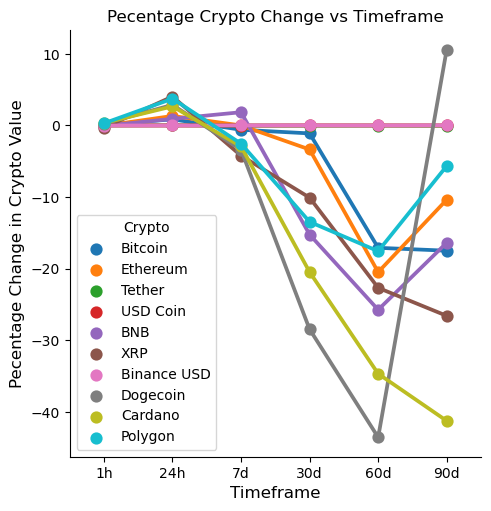

In [15]:
#Visualize the crypto coin trend over different timeframe

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point', legend=False)

plt.xlabel('Timeframe', fontsize = 12)
plt.ylabel('Pecentage Change in Crypto Value', fontsize = 12)
plt.title('Pecentage Crypto Change vs Timeframe')
plt.legend(title='Crypto') #to change the legnd title from 'name' to 'Crpyto'

In [16]:
# Create a dataframe with the specific currency, say Bitcoin

df7 = df[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'") #query Bitcoin from the dataframe
#df8 = df8.query("name == 'Bitcoin' or name == 'Ethereum'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,16752.36104,2023-01-02 22:20:26.605816
10,Bitcoin,16749.32200,2023-01-02 22:21:27.040918
20,Bitcoin,16748.75480,2023-01-02 22:22:27.433768
30,Bitcoin,16748.39028,2023-01-02 22:23:27.811452
40,Bitcoin,16748.65658,2023-01-02 22:24:28.041642
50,Bitcoin,16748.65658,2023-01-02 22:25:28.471161
60,Bitcoin,16747.93227,2023-01-02 22:26:28.864507
70,Bitcoin,16748.06129,2023-01-02 22:27:29.415840


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

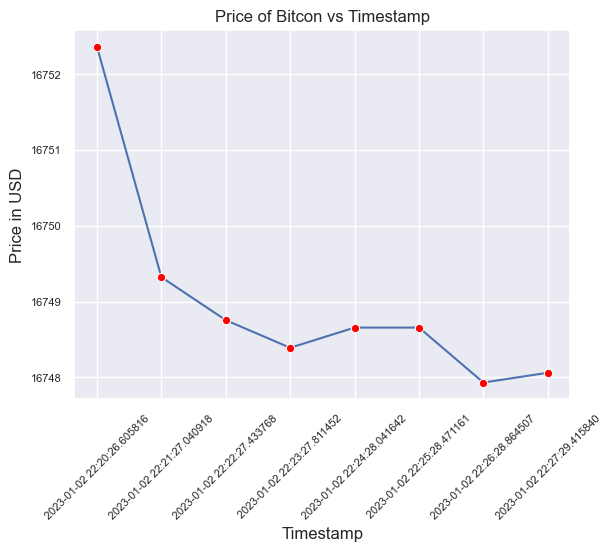

In [27]:
#Visualize for clear insights into Bitcoin trend

sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df7, marker='o', markerfacecolor='red')

plt.ticklabel_format(style='plain', axis='y', useOffset=False) #to disable scientific notations

plt.tick_params(labelsize=8)
plt.xlabel('Timestamp')
plt.ylabel('Price in USD')
plt.title('Price of Bitcon vs Timestamp')
plt.xticks(rotation=45)